In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
movie_titles_df = pd.read_csv('C:/Users/jaehong/Documents/GitHub/my_study/data/Movie_Id_Titles.csv')
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [14]:
movie_rating_df = pd.read_csv('data/user_rating.csv')
movie_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [15]:
# movie_rating_df.iloc[:, :3]
# movie_rating_df.loc[:, 'user_id':'timestamp']

In [16]:
movie_rating_df.drop('timestamp', axis=1, inplace=True)
movie_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [17]:
# 두개의 데이터프레임을 하나로 합친다.


In [18]:
movie_titles_df.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [19]:
movie_rating_df.head(2)

,user_id,item_id,rating
0,0,50,5
1,0,172,5


In [20]:
# 공통 연결고리 컬럼이 있는 경우 합치는 방법

In [21]:
movie_rating_df = pd.merge(movie_titles_df, movie_rating_df, on = 'item_id', how='left')

In [22]:
# 각 영화별로,기본 통계치를 보여달라

In [23]:
movie_rating_df.groupby('title')['rating'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
They Made Me a Criminal (1939),1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Someone Else's America (1995),1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Star Kid (1997),3.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
King of New York (1990),1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Touki Bouki (Journey of the Hyena) (1973),1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


각 영화별 별점의 평균을 구하고
이를 rating_df_maean 이라는 변수로 저장


In [24]:
rating_df_maean = movie_rating_df.groupby('title')['rating'].mean()

각 영화별 리뷰는 몇개 있는지 구하고,
이를 rating_df_count 라는 변수에 저장


In [25]:
rating_df_count =movie_rating_df.groupby('title')['rating'].count()

판다스의 시리즈를 데이터프레임으로 만든다.

In [26]:
df1 = rating_df_maean.to_frame()

In [27]:
df2 = rating_df_count.to_frame()

In [28]:
df1.head(2)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000


In [29]:
df2.head(2)

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5


In [30]:
# 컬럼이 중복되면 안되니 변경해줌

In [31]:
df1.columns =['mean'] #컬럼이 하나라서 이렇게 가능 rename 써도됨

In [32]:
df1

,mean
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [33]:
df2.rename(columns={'rating' : 'count'}, inplace=True)

In [34]:
rating_mean_count_df = df1.join(df2)

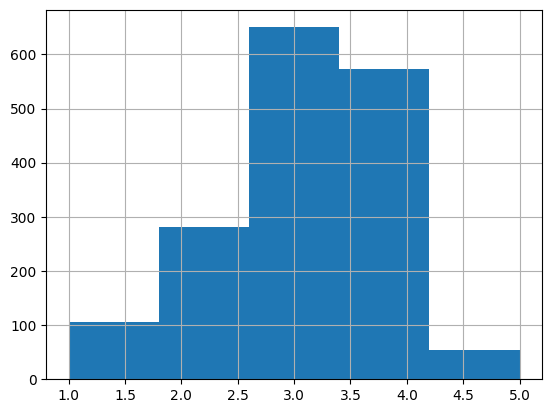

In [35]:
rating_mean_count_df['mean'].hist(bins= 5)
plt.show()

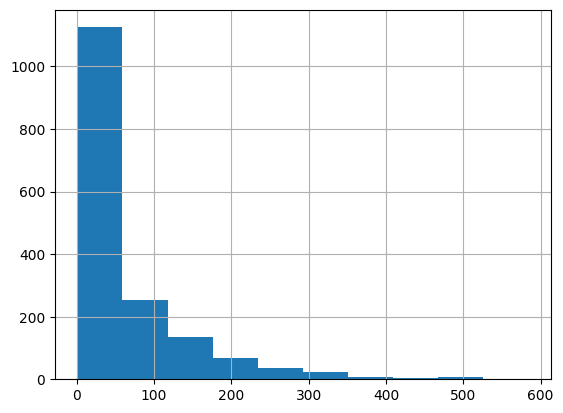

In [36]:
rating_mean_count_df['count'].hist()
plt.show()

리뷰갯수가 500개 이상 되는 영화를 확인해보자

In [37]:
rating_mean_count_df['count']>=500

title
'Til There Was You (1997)                False
1-900 (1994)                             False
101 Dalmatians (1996)                    False
12 Angry Men (1957)                      False
187 (1997)                               False
                                         ...  
Young Guns II (1990)                     False
Young Poisoner's Handbook, The (1995)    False
Zeus and Roxanne (1997)                  False
unknown                                  False
Á köldum klaka (Cold Fever) (1994)       False
Name: count, Length: 1664, dtype: bool

In [38]:
rating_mean_count_df.loc[rating_mean_count_df['count']>=500, ]

,mean,count
title,,
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Star Wars (1977),4.359589,584


영화 추천 시스템 개발
Item based Collaborative Filtering  기법

영화간의 유사도를 측정할건데, 유사도는 상관계수로 측정할거다

In [39]:
movie_rating_df

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1
99999,1679,B. Monkey (1998),863,3
100000,1680,Sliding Doors (1998),863,2
100001,1681,You So Crazy (1994),896,3


In [40]:
movie_rating_df['user_id'].nunique()

944

In [41]:
df= movie_rating_df.pivot_table(columns='title', index='user_id', values='rating', aggfunc='mean') #  aggfunc='mean' 중복된 값은 평균으로

타이타닉 영화와, 전체 영화의 상관계수를 구하라
즉 특정 컬럼과 전체 컬럼의 상관계수 구하는 방법


In [42]:
df['Titanic (1997)']

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [43]:
# 타이타닉과 모든 영화의 상관계수 측정
corr_titanic =df.corrwith(df['Titanic (1997)'])      # 특정 컬럼과 전체 컬럼 관계

c:\Users\jaehong\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\jaehong\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [44]:
corr_titanic=corr_titanic.to_frame()

In [45]:
corr_titanic.columns = ['correlation']

corr_titanic

,correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [46]:
rating_mean_count_df['count']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: count, Length: 1664, dtype: int64

In [47]:
corr_titanic=corr_titanic.join(rating_mean_count_df['count'])

In [48]:
corr_titanic.dropna(inplace=True)

In [49]:
corr_titanic.sort_values('correlation', ascending=False)

,correlation,count
title,,
Nadja (1994),1.0,8
"Pest, The (1997)",1.0,8
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3
For Ever Mozart (1996),1.0,3
"Jerky Boys, The (1994)",1.0,3
...,...,...
Pather Panchali (1955),-1.0,8
Angel Baby (1995),-1.0,4
Blood Beach (1981),-1.0,6


위의 방법은 리뷰 갯수 1개짜리도 포함되어 있으니까 신뢰도가 떨어진다
따라서 리뷰갯수가 80개 이상인 데이터를 가지고 상관계수를 보자.

In [51]:
corr_titanic.loc[corr_titanic['count']>=80, ].sort_values('correlation', axis = 0 )

,correlation,count
title,,
James and the Giant Peach (1996),-0.370248,126
"Unbearable Lightness of Being, The (1988)",-0.314476,92
Cold Comfort Farm (1995),-0.307150,125
Richard III (1995),-0.275451,89
Brazil (1985),-0.243532,208
...,...,...
True Lies (1994),0.435104,208
Bram Stoker's Dracula (1992),0.443560,120
"Abyss, The (1989)",0.472103,151


In [52]:
corr_titanic.loc[corr_titanic['count']>=80, ].sort_values('correlation', axis = 0, ascending=False)

,correlation,count
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Brazil (1985),-0.243532,208
Richard III (1995),-0.275451,89
Cold Comfort Farm (1995),-0.307150,125
